# 01 Multitemporal SAR composites using GDAL

In [1]:
%matplotlib inline
import sys
import os

import gdal
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

import warnings
warnings.filterwarnings("ignore")

In [2]:
base_path = 'https://store.terradue.com/api/dlr-insarql-hr/production/2017/06/21/S1A_IW_SLC__1SDV_20170613T114204_20170613T114231_017015_01C561_53A9_S1B_IW_SLC__1SDV_20170619T114124_20170619T114154_006119_00ABFC_8442'

In [3]:
prds =[ 'GEO_AMPL_CAL_QL_MASTER.tiff', 'GEO_AMPL_CAL_QL_SLAVE.tiff', 'GEO_DCOHER.tiff' ] 

url_master = '/vsicurl/%s/%s' % ( base_path, 'GEO_AMPL_CAL_QL_MASTER.tiff')
url_slave = '/vsicurl/%s/%s' % ( base_path, 'GEO_AMPL_CAL_QL_SLAVE.tiff')
url_coherence = '/vsicurl/%s/%s' % ( base_path, 'GEO_DCOHER.tiff' )

urls_input = [ url_master, url_slave, url_coherence]

In [4]:
lon = 98.3755246
lat = 3.1696344

extent = 0.1

llx = lon - extent
lly = lat - extent
urx = lon + extent
ury = lat + extent

bands = []

In [5]:
for index, item in enumerate(prds, start = 0):
    ds = gdal.Open('/vsicurl/%s/%s' % ( base_path, item ))
    ds = gdal.Warp('_' + item,
                        ds, 
                        outputBounds = [ llx, lly, urx, ury ],
                        srcSRS = 'EPSG:4326',
                        dstSRS = 'EPSG:4326')
    

In [6]:
ds = gdal.Open(r'_GEO_AMPL_CAL_QL_MASTER.tiff')
band_master = ds.GetRasterBand(1).ReadAsArray()

ds = gdal.Open(r'_GEO_AMPL_CAL_QL_SLAVE.tiff')
band_slave = ds.GetRasterBand(1).ReadAsArray()

ds = gdal.Open(r'_GEO_DCOHER.tiff')
band_coherence = ds.GetRasterBand(1).ReadAsArray()

In [7]:
img = np.dstack((band_master, band_slave, band_coherence))

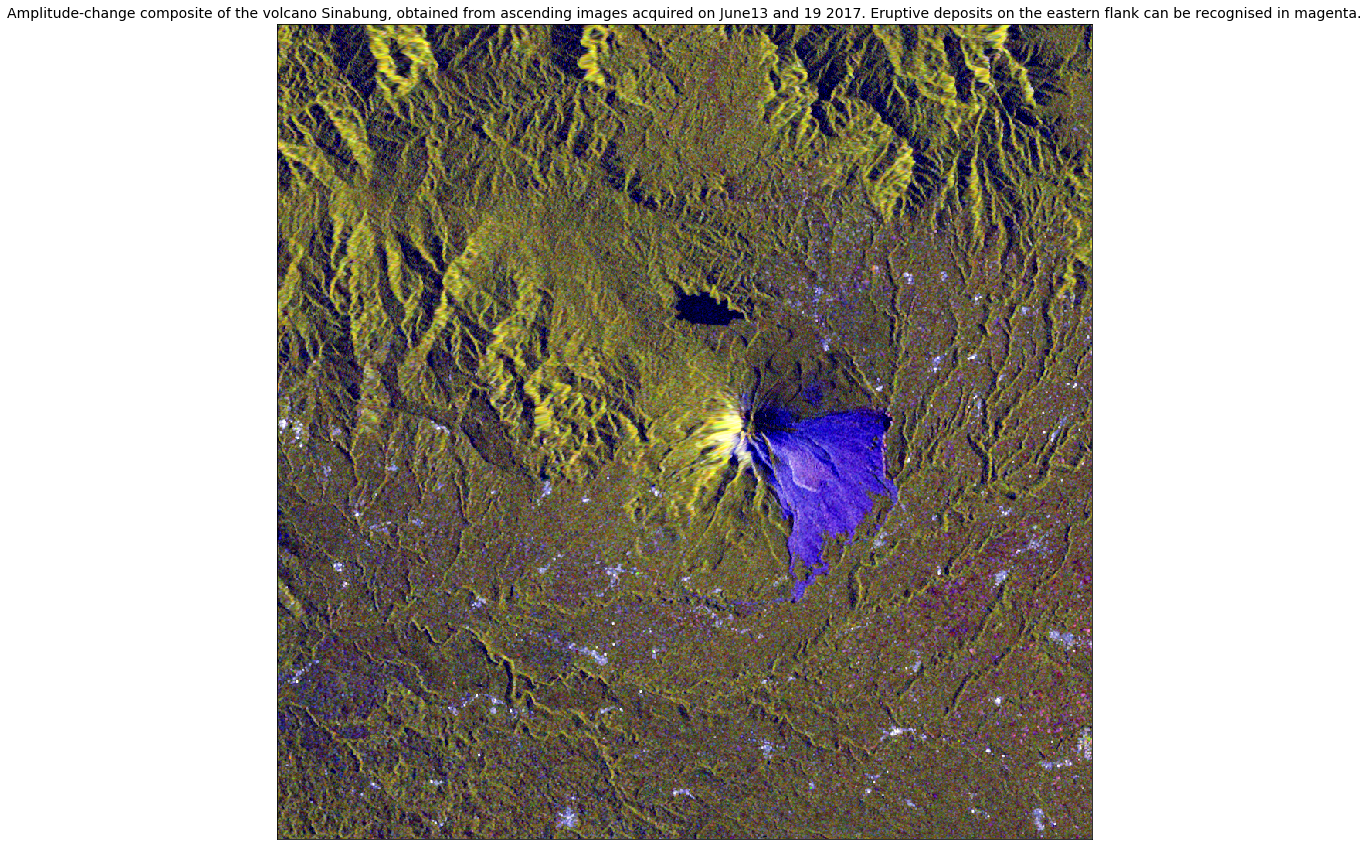

In [8]:
lon = 98.3755246
lat = 3.1696344

extent = 0.1

x_min = lon - extent
y_min = lat - extent
x_max = lon + extent
y_max = lat + extent

fig = plt.figure(figsize=(15,15))  # a new figure window
ax = fig.add_subplot(1, 1, 1)  # specify (nrows, ncols, axnum)
ax.set_title('Amplitude-change composite of the volcano Sinabung, obtained from ascending images acquired on June13 and 19 2017. Eruptive deposits on the eastern flank can be recognised in magenta.', fontsize=14)

map = Basemap(projection = 'merc',
              llcrnrlat = y_min,
              urcrnrlat = y_max,
              llcrnrlon = x_min,
              urcrnrlon = x_max,
              resolution='i',
              ax=ax)

map.imshow(img, origin='upper', ax=ax)
map.drawcountries(color='blue', linewidth=1.5, ax=ax)
map.drawcoastlines(linewidth=1.5, color='red', ax=ax)

In [9]:
img = np.dstack((band_master, band_slave, band_slave))

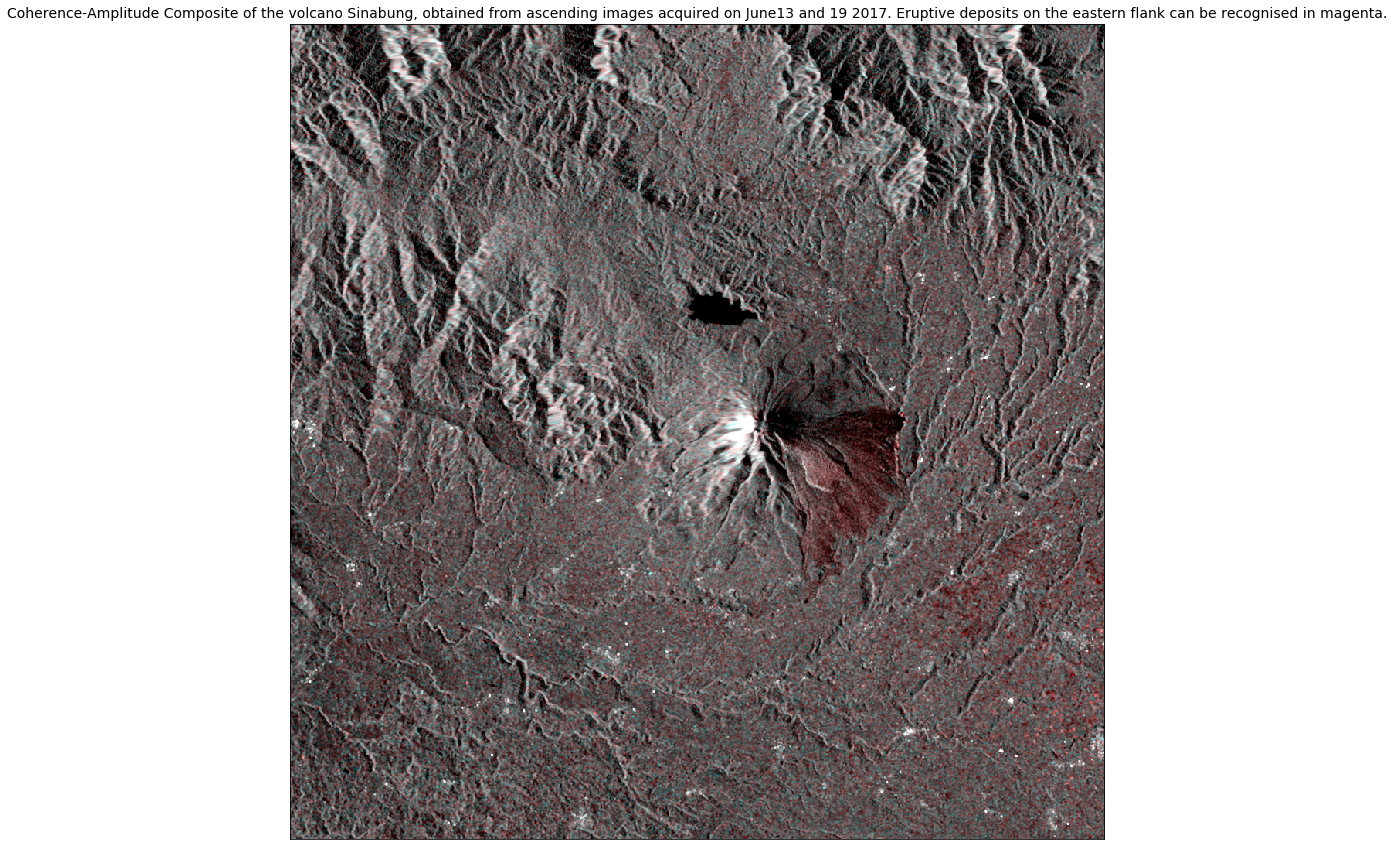

In [10]:
lon = 98.3755246
lat = 3.1696344

extent = 0.1

x_min = lon - extent
y_min = lat - extent
x_max = lon + extent
y_max = lat + extent

fig = plt.figure(figsize=(15,15))  # a new figure window
ax = fig.add_subplot(1, 1, 1)  # specify (nrows, ncols, axnum)
ax.set_title('Coherence-Amplitude Composite of the volcano Sinabung, obtained from ascending images acquired on June13 and 19 2017. Eruptive deposits on the eastern flank can be recognised in magenta.', fontsize=14)

map = Basemap(projection = 'merc',
              llcrnrlat = y_min,
              urcrnrlat = y_max,
              llcrnrlon = x_min,
              urcrnrlon = x_max,
              resolution='i',
              ax=ax)

map.imshow(img, origin='upper', ax=ax)
map.drawcountries(color='blue', linewidth=1.5, ax=ax)
map.drawcoastlines(linewidth=1.5, color='red', ax=ax)

In [11]:
os.remove('_GEO_AMPL_CAL_QL_MASTER.tiff')
os.remove('_GEO_AMPL_CAL_QL_SLAVE.tiff')
os.remove('_GEO_DCOHER.tiff')